## Summary

This dataset focuses on air quality assessment across various regions.                                       The dataset contains 5000 samples and captures critical environmental and demographic factors that influence pollution levels.

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import plot_tree

# Mute the sklearn and IPython warnings
import warnings
warnings.filterwarnings('ignore', module='sklearn')
warnings.filterwarnings('ignore', module='IPython')

In [2]:
data = pd.read_csv('pollution_dataset.csv', sep=',')
data.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [3]:
data = data.rename(columns={'Air Quality': 'Air_Quality'})

In [4]:
label_encoder = LabelEncoder()
data['Air_Quality_Encoded'] = label_encoder.fit_transform(data['Air_Quality'])
print("Air_Quality Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Air_Quality Mapping: {'Good': 0, 'Hazardous': 1, 'Moderate': 2, 'Poor': 3}


In [5]:
data.drop(['Air_Quality'], axis=1, inplace=True)

In [6]:
data.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air_Quality_Encoded
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0


In [7]:
data.shape

(5000, 10)

In [8]:
data.Air_Quality_Encoded.value_counts()

Air_Quality_Encoded
0    2000
2    1500
3    1000
1     500
Name: count, dtype: int64

<Axes: xlabel='Air_Quality_Encoded'>

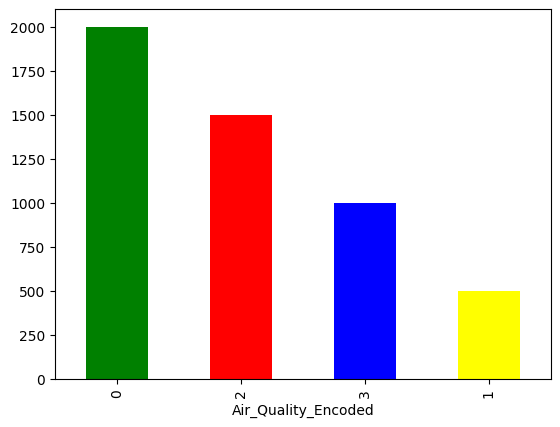

In [9]:
data.Air_Quality_Encoded.value_counts().plot.bar(color=['green', 'red', 'blue', 'yellow'])

In [10]:
pd.DataFrame([[i, len(data[i].unique())] for i in data.columns],
             columns=['Variable', 'Unique Values']).set_index('Variable')

,Unique Values
Variable,
Temperature,362
Humidity,723
PM2.5,815
PM10,955
NO2,445
SO2,348
CO,265
Proximity_to_Industrial_Areas,179
Population_Density,683


## Featureset Exploration

#### Key Features:

* Temperature (°C): Average temperature of the region.
* Humidity (%): Relative humidity recorded in the region.
* PM2.5 Concentration (µg/m³): Fine particulate matter levels.
* PM10 Concentration (µg/m³): Coarse particulate matter levels.
* NO2 Concentration (ppb): Nitrogen dioxide levels.
* SO2 Concentration (ppb): Sulfur dioxide levels.
* CO Concentration (ppm): Carbon monoxide levels.
* Proximity to Industrial Areas (km): Distance to the nearest industrial zone.
* Population Density (people/km²): Number of people per square kilometer in the region.


#### Target Variable: Air Quality Levels

* Good: Clean air with low pollution levels.
* Moderate: Acceptable air quality but with some pollutants present.
* Poor: Noticeable pollution that may cause health issues for sensitive groups.
* Hazardous: Highly polluted air posing serious health risks to the population.

In [11]:
data.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air_Quality_Encoded              0
dtype: int64

<Axes: >

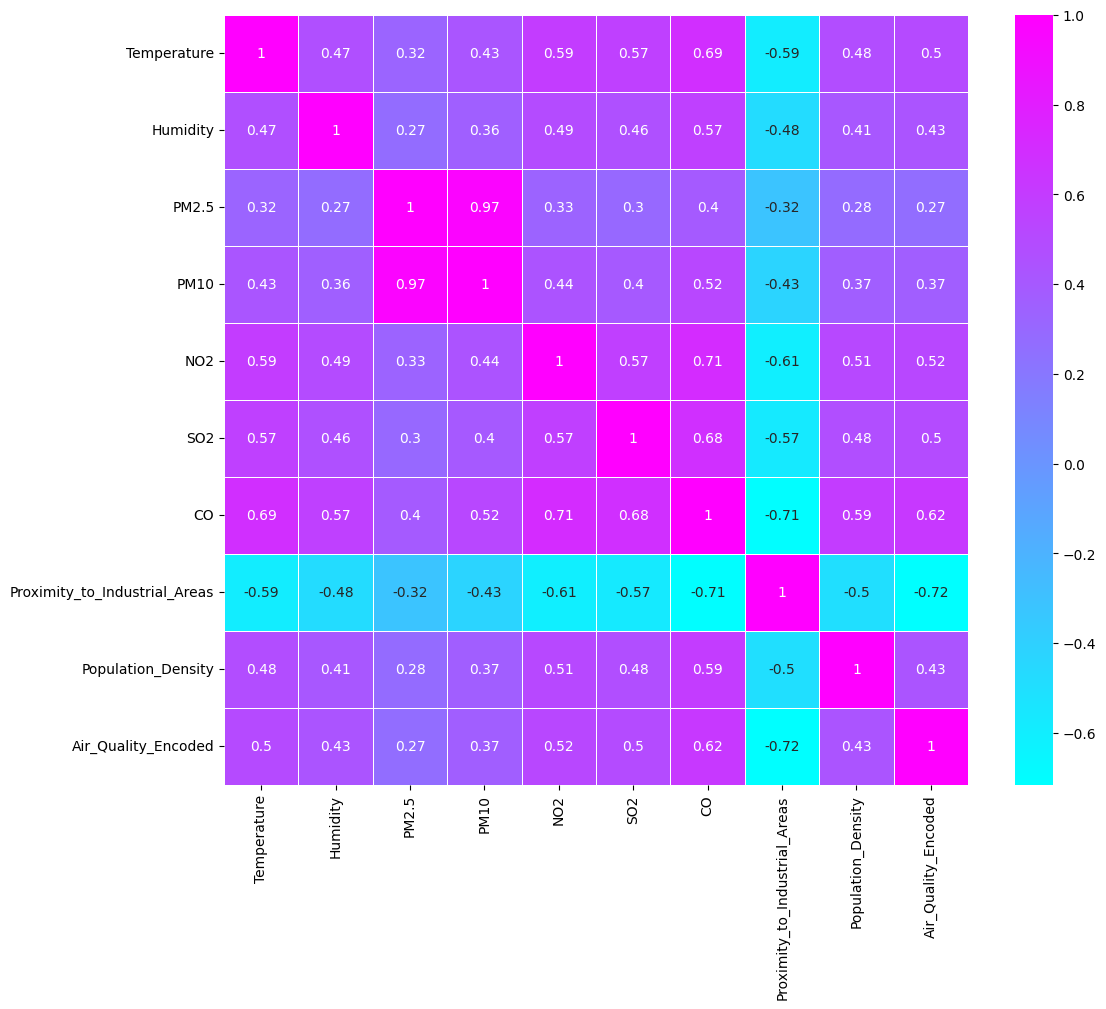

In [12]:
plt.figure(figsize = (12, 10))
sns.heatmap(data.corr(), annot = True, linewidths=.5, cmap = plt.cm.cool)

As we can see all the features have a big correlation between themselves

In [13]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

In [14]:
X.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303


In [15]:
y.head()

,Air_Quality_Encoded
0,2
1,2
2,2
3,0
4,0


## Featuring Scaling

In [16]:
mm = MinMaxScaler()
columns = X.columns
for column in columns:
   X[[column]] = mm.fit_transform(X[[column]])

In [17]:
X.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
0,0.362832,0.250814,0.017627,0.057278,0.200000,0.301370,0.348534,0.163090,0.170351
1,0.329646,0.429967,0.007797,0.039241,0.406957,0.311155,0.322476,0.150215,0.550065
2,0.214602,0.420195,0.090508,0.107595,0.295652,0.367906,0.319218,0.115880,0.560468
3,0.303097,0.033659,0.020678,0.020570,0.106087,0.225049,0.162866,0.369099,0.472042
4,0.289823,0.376764,0.023390,0.051266,0.252174,0.230920,0.117264,0.437768,0.149545


## Split the data

Split the data into train and test data sets 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state = 123)

In [19]:
len(X_test), len(X_train)

(1500, 3500)

## Train models

* Logistic regression
* K-nearest neighbors algorithm
* Decision Tree
* Random Forest

The following function helps us to print the metrics of each analysis method

In [20]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

### Logistic Regression

In [21]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [22]:
lr_preds = lr.predict(X_test)

In [23]:
lr_results = evaluate_metrics(y_test, lr_preds)
lr_results

{'accuracy': 0.858,
 'recall': array([1.        , 0.74      , 0.87777778, 0.60333333]),
 'precision': array([0.93023256, 0.90243902, 0.78373016, 0.79385965]),
 'f1score': array([0.96385542, 0.81318681, 0.82809224, 0.68560606])}

### K-nearest Neighbors

In [24]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn = knn.fit(X_train, y_train)

In [25]:
knn_preds = knn.predict(X_test)

In [26]:
knn_results = evaluate_metrics(y_test, knn_preds)
knn_results

{'accuracy': 0.9346666666666666,
 'recall': array([1.        , 0.78      , 0.96222222, 0.84      ]),
 'precision': array([0.98039216, 0.8540146 , 0.93926247, 0.86896552]),
 'f1score': array([0.99009901, 0.81533101, 0.95060373, 0.85423729])}

### Decision Tree

In [27]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

In [28]:
dt.tree_.node_count, dt.tree_.max_depth

(377, 20)

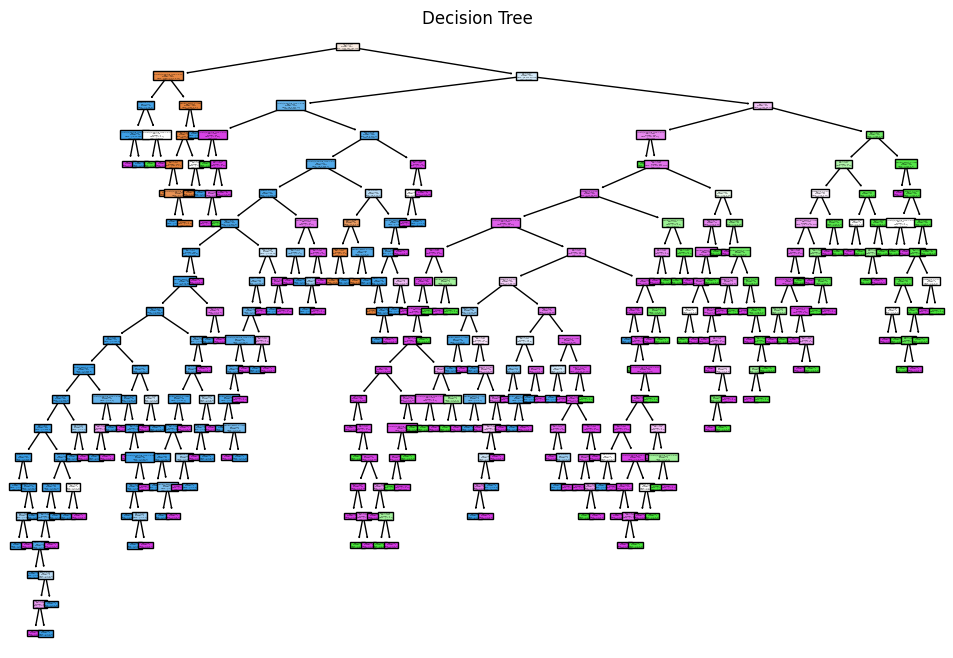

In [29]:
feature_cols = list(X.columns)
plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=feature_cols, class_names=label_encoder.classes_)  # Use encoded classes
plt.title('Decision Tree')
plt.savefig('pollution_tree.png')  # Save the tree as an image
plt.show()

In [30]:
dt_preds = knn.predict(X_test)

In [31]:
dt_results = evaluate_metrics(y_test, dt_preds)
dt_results

{'accuracy': 0.9346666666666666,
 'recall': array([1.        , 0.78      , 0.96222222, 0.84      ]),
 'precision': array([0.98039216, 0.8540146 , 0.93926247, 0.86896552]),
 'f1score': array([0.99009901, 0.81533101, 0.95060373, 0.85423729])}

### Random Forest

In [32]:
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

In [33]:
# initialise list for out of bag error
oob_list = list()

# Iterate through all of the possibilities for number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)
    
    # Fit the model
    RF.fit(X_train, y_train)
    
    # Get the out of bag error and store it
    oob_error = 1 - RF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

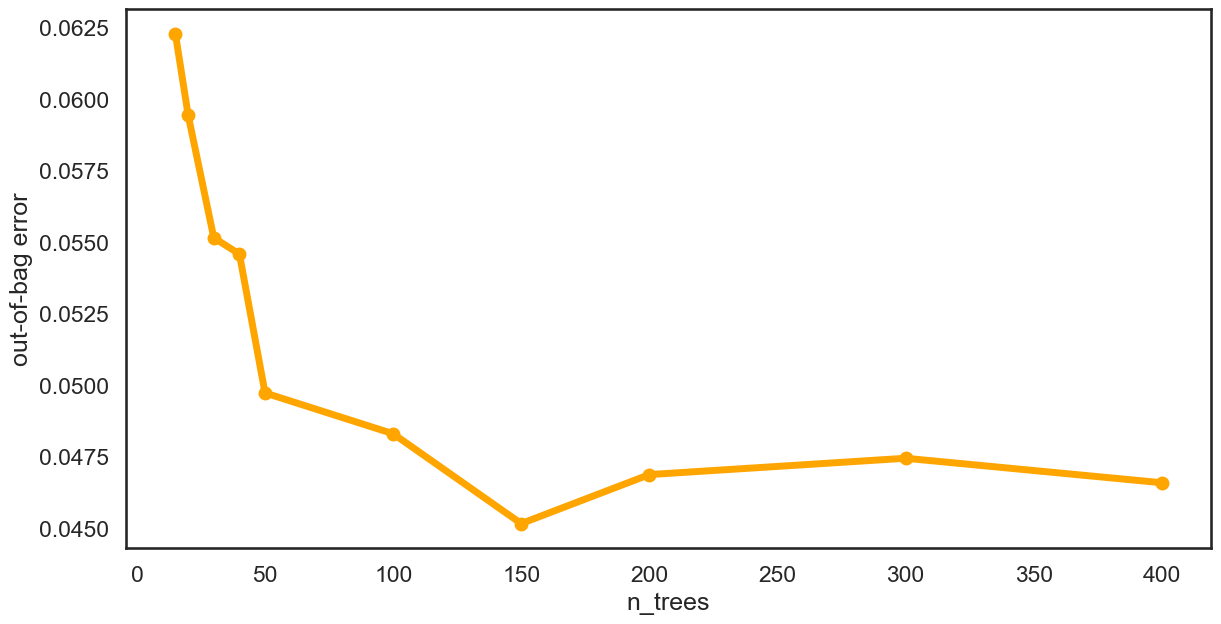

In [34]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', color="orange", figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [35]:
rf = RF.set_params(n_estimators=150)

In [36]:
rf_preds = rf.predict(X_test)

In [37]:
rf_results = evaluate_metrics(y_test, rf_preds)
rf_results

{'accuracy': 0.958,
 'recall': array([0.99833333, 0.83333333, 0.97555556, 0.91333333]),
 'precision': array([1.        , 0.88652482, 0.97555556, 0.88387097]),
 'f1score': array([0.99916597, 0.85910653, 0.97555556, 0.89836066])}

## Results

On this part a heatmap is plotted in order to compare the predictions of each method

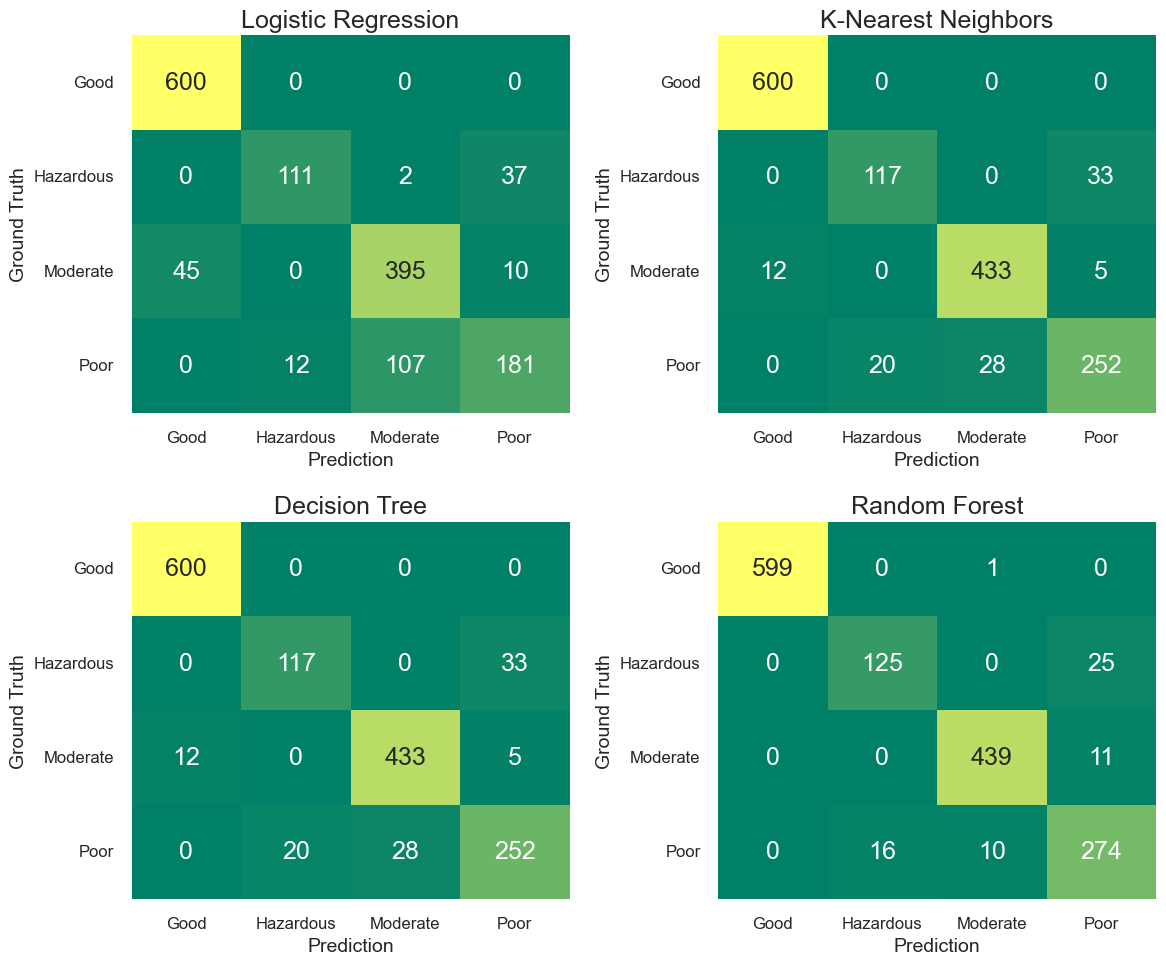

In [38]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

models = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest']
cm = [
    confusion_matrix(y_test, lr_preds),
    confusion_matrix(y_test, knn_preds),
    confusion_matrix(y_test, dt_preds),
    confusion_matrix(y_test, rf_preds)
]

labels = list(label_encoder.classes_) 

for ax, model, idx in zip(axList, models, range(4)):
    sns.heatmap(
        cm[idx], 
        ax=ax, 
        annot=True, 
        fmt='d', 
        cmap='summer', 
        cbar=False, 
        xticklabels=labels, 
        yticklabels=labels
    )
    ax.set_title(model, fontsize=18)
    ax.set_xticklabels(labels, fontsize=12)
    ax.set_yticklabels(labels, fontsize=12)
    ax.set_ylabel('Ground Truth', fontsize=14)
    ax.set_xlabel('Prediction', fontsize=14)

plt.tight_layout()
plt.show()

In [39]:
results = {
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest'],
    'Accuracy': [lr_results['accuracy'], knn_results['accuracy'], dt_results['accuracy'], rf_results['accuracy']],
    'Precision': [lr_results['precision'].mean(), knn_results['precision'].mean(), dt_results['precision'].mean(), rf_results['precision'].mean()],
    'Recall': [lr_results['recall'].mean(), knn_results['recall'].mean(), dt_results['recall'].mean(), rf_results['recall'].mean()],
    'F1-Score': [lr_results['f1score'].mean(), knn_results['f1score'].mean(), dt_results['f1score'].mean(), rf_results['f1score'].mean()]
}

results_df = pd.DataFrame(results)

print(results_df.to_string(index=False))

              Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression  0.858000   0.852565 0.805278  0.822685
K-Nearest Neighbors  0.934667   0.910659 0.895556  0.902568
      Decision Tree  0.934667   0.910659 0.895556  0.902568
      Random Forest  0.958000   0.936488 0.930139  0.933047


We can see that the Random Forest Method had a slightly better performance comparing to the other methods

## Next Steps

We could further optimize these models by using GridSearchCV or Boosting algorithms